# Assignment 1: Image Filtering and Edge Detection

ECSE 415 Introduction to Computer Vision

Instructor: James Clark

Ann Trinh 260985522

In [38]:
path = '/content/drive/My Drive/McGill Jazz/Courses/ECSE 415/'

In [39]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# importing libraries used throughout the assignment
import matplotlib.pyplot as plt
import cv2
import numpy as np

## 1 Image Acquisition

In [41]:
# read and convert images to RGB
image_A = cv2.imread(path + 'Image_A.jpg')
image_B = cv2.imread(path + 'Image_B.jpg')

image_A_rgb = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
image_B_rgb = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

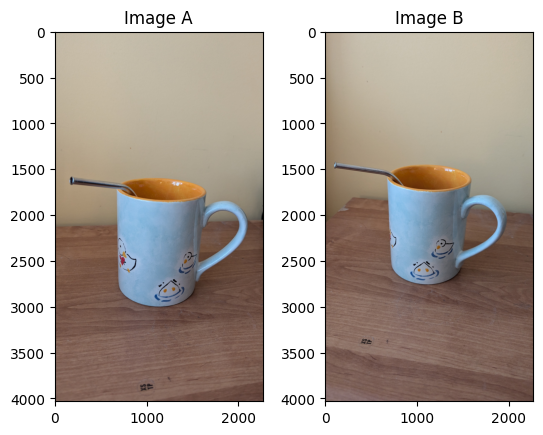

In [42]:
# display images
plt.subplot(121), plt.imshow(image_A_rgb)
plt.title("Image A")
plt.subplot(122), plt.imshow(image_B_rgb)
plt.title("Image B")
plt.show()

## 2 Convert to Grayscale

The provided Python statment:
```
gray_<A|B> = np.dot(your_image[...,:3], [0.2989, 0.5870, 0.1140])
```
is used to covert a RGB color image into a grayscale image.


This statement does the conversion by applying a the dot product on two arrays. The first array is ```your_image[...,:3]``` which is a 3D array that extracts the RGB values of every pixel in the image. The second array is ```[0.2989, 0.5870, 0.1140]``` which is the weights that is applied to the corresponding color channel.

To get a grayscale value for a single pixel the formula that is being used looks like the following:
```
gray[y,x] = (R * 0.2989) + (G * 0.5870) + (B * 0.1140)
```

In [43]:
# converting to grayscale by manipulating each pixel
gray_A = np.dot(image_A_rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray_B = np.dot(image_B_rgb[...,:3], [0.2989, 0.5870, 0.1140])

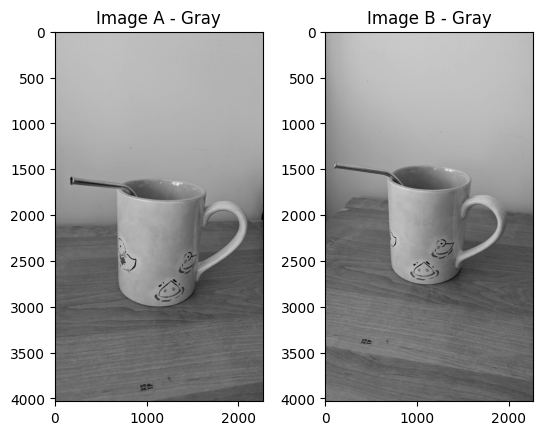

In [44]:
plt.subplot(121), plt.imshow(gray_A, cmap='gray')
plt.title("Image A - Gray")
plt.subplot(122), plt.imshow(gray_B, cmap='gray')
plt.title("Image B - Gray")
plt.show()

## 3 Resize the images

In [45]:
from skimage.transform import resize

def resize_img(img):
  scale_factor = 0

  # identifying the largest dimension and getting the scale factor
  if img.shape[0] > img.shape[1]:
    scale_factor = 256.0 / img.shape[0]
  else:
    scale_factor = 256.0 / img.shape[1]

  # resize using the scale factor
  resized = resize(
    img, (img.shape[0] * scale_factor, img.shape[1] * scale_factor), anti_aliasing=True
  )

  return resized

In [46]:
# apply resize to images
resized_A = resize_img(image_A_rgb)
resized_B = resize_img(image_B_rgb)
resized_A_gray = resize_img(gray_A)
resized_B_gray = resize_img(gray_B)

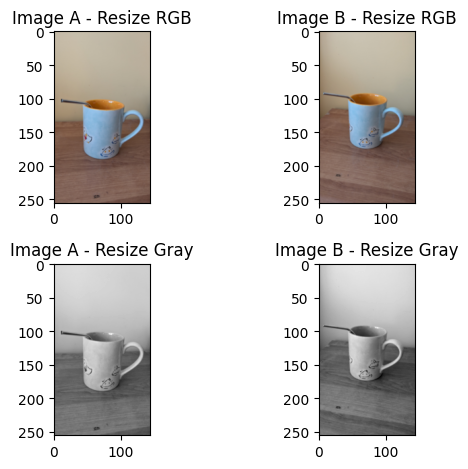

In [47]:
plt.subplot(221), plt.imshow(resized_A)
plt.title("Image A - Resize RGB")
plt.subplot(222), plt.imshow(resized_B)
plt.title("Image B - Resize RGB")
plt.subplot(223), plt.imshow(resized_A_gray, cmap='gray')
plt.title("Image A - Resize Gray")
plt.subplot(224), plt.imshow(resized_B_gray, cmap='gray')
plt.title("Image B - Resize Gray")
plt.tight_layout()
plt.show()

## 4 Smooth the images using Gaussian smoothing

In [48]:
# general convolution code taking image and kernel as input
def convolve_img(img, kernel):
  (image_y, image_x) = img.shape[:2]
  (kernel_y, kernel_x) = kernel.shape[:2]

  result = np.zeros(img.shape)
  pad_x = kernel_x // 2
  pad_y = kernel_y // 2

  # looping over each pixel
  for x in range(pad_x, image_x - pad_x):
    for y in range(pad_y, image_y - pad_y):
      region = img[y - pad_y : y + pad_y + 1, x - pad_x : x + pad_x + 1]
      k = np.sum(kernel * region)
      result[y,x] = k

  return result

In [49]:
# calculating for a gaussian kernel, taking kernel size and sigma as input
def create_gaussian_kernel(dimension, sigma):
  center = dimension // 2
  kernel = np.empty((dimension, dimension))

  for i in range(dimension):
    for j in range(dimension):
      exp = (((i - center) ** 2) + ((j - center) ** 2))/(2.0 * (sigma ** 2))
      kernel[i, j] = (1.0 / (2.0 * np.pi * (sigma ** 2))) * np.exp(-exp)

  return kernel

### Using 5x5 pixel Gaussian kernel

In [50]:
# creating 5x5 kernel and applying convolution to images
kernel_five = create_gaussian_kernel(5, 1)
smooth_A_five = convolve_img(resized_A_gray, kernel_five)
smooth_B_five = convolve_img(resized_B_gray, kernel_five)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


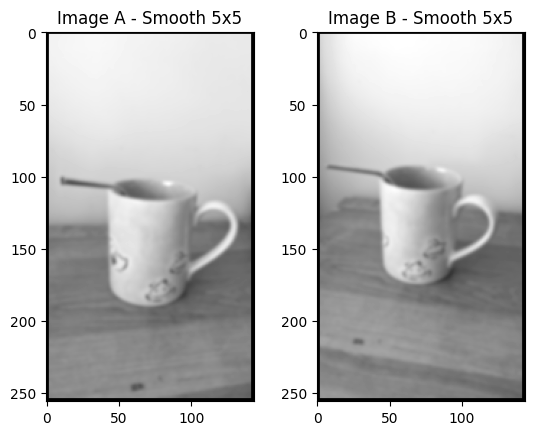

In [51]:
# display kernel and smoothed images
print(kernel_five)

plt.subplot(121), plt.imshow(smooth_A_five, cmap='gray')
plt.title("Image A - Smooth 5x5")
plt.subplot(122), plt.imshow(smooth_B_five, cmap='gray')
plt.title("Image B - Smooth 5x5")
plt.show()

### Using 15x15 pixel Gaussian kernel

In [52]:
# create 15x15 kernel and apply to images
kernel_fifteen = create_gaussian_kernel(15, 1)
smooth_A_fifteen = convolve_img(resized_A_gray, kernel_fifteen)
smooth_B_fifteen = convolve_img(resized_B_gray, kernel_fifteen)

[[8.34431169e-23 5.55014911e-20 1.35807671e-17 1.22250169e-15
  4.04836961e-14 4.93192384e-13 2.21033492e-12 3.64422619e-12
  2.21033492e-12 4.93192384e-13 4.04836961e-14 1.22250169e-15
  1.35807671e-17 5.55014911e-20 8.34431169e-23]
 [5.55014911e-20 3.69163524e-17 9.03313360e-15 8.13136774e-13
  2.69273918e-11 3.28042787e-10 1.47018578e-09 2.42392656e-09
  1.47018578e-09 3.28042787e-10 2.69273918e-11 8.13136774e-13
  9.03313360e-15 3.69163524e-17 5.55014911e-20]
 [1.35807671e-17 9.03313360e-15 2.21033492e-12 1.98968008e-10
  6.58891552e-09 8.02694235e-08 3.59742598e-07 5.93115274e-07
  3.59742598e-07 8.02694235e-08 6.58891552e-09 1.98968008e-10
  2.21033492e-12 9.03313360e-15 1.35807671e-17]
 [1.22250169e-15 8.13136774e-13 1.98968008e-10 1.79105293e-08
  5.93115274e-07 7.22562324e-06 3.23829967e-05 5.33905355e-05
  3.23829967e-05 7.22562324e-06 5.93115274e-07 1.79105293e-08
  1.98968008e-10 8.13136774e-13 1.22250169e-15]
 [4.04836961e-14 2.69273918e-11 6.58891552e-09 5.93115274e-07
  

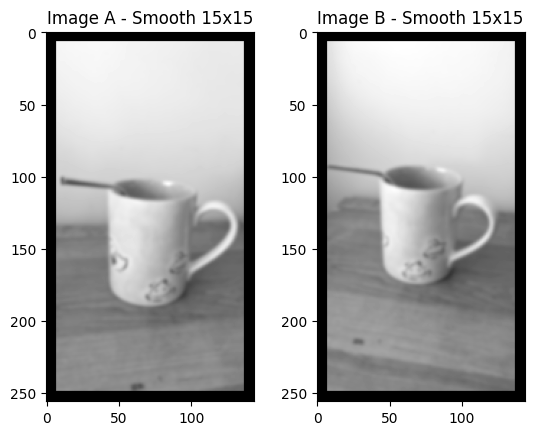

In [53]:
print(kernel_fifteen)

plt.subplot(121), plt.imshow(smooth_A_fifteen, cmap='gray')
plt.title("Image A - Smooth 15x15")
plt.subplot(122), plt.imshow(smooth_B_fifteen, cmap='gray')
plt.title("Image B - Smooth 15x15")
plt.show()

## 5 Compute Image Gradients

### Vertical Edge Sobel FIlter

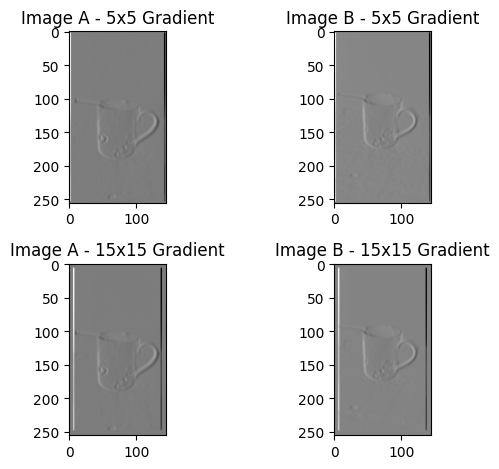

In [54]:
# initializing a 3x3 sobel filter
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# apply sobel filter on smoothed images
sobel_x_A_five = convolve_img(smooth_A_five, sobel_x)
sobel_x_B_five = convolve_img(smooth_B_five, sobel_x)
sobel_x_A_fifteen = convolve_img(smooth_A_fifteen, sobel_x)
sobel_x_B_fifteen = convolve_img(smooth_B_fifteen, sobel_x)

plt.subplot(221), plt.imshow(sobel_x_A_five, cmap='gray')
plt.title("Image A - 5x5 Gradient")
plt.subplot(222), plt.imshow(sobel_x_B_five, cmap='gray')
plt.title("Image B - 5x5 Gradient")
plt.subplot(223), plt.imshow(sobel_x_A_fifteen, cmap='gray')
plt.title("Image A - 15x15 Gradient")
plt.subplot(224), plt.imshow(sobel_x_B_fifteen, cmap='gray')
plt.title("Image B - 15x15 Gradient")
plt.tight_layout()
plt.show()

### Horizontal Edge Sobel Filter

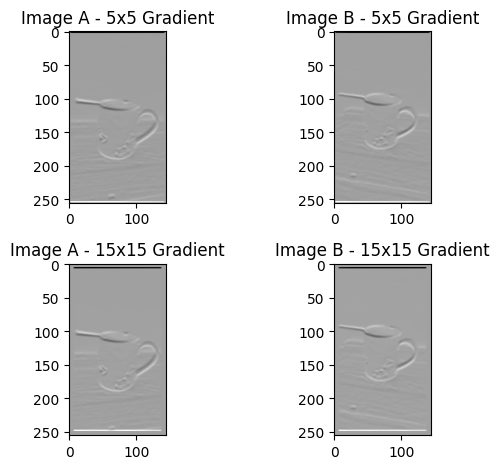

In [55]:
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

sobel_y_A_five = convolve_img(smooth_A_five, sobel_y)
sobel_y_B_five = convolve_img(smooth_B_five, sobel_y)
sobel_y_A_fifteen = convolve_img(smooth_A_fifteen, sobel_y)
sobel_y_B_fifteen = convolve_img(smooth_B_fifteen, sobel_y)

plt.subplot(221), plt.imshow(sobel_y_A_five, cmap='gray')
plt.title("Image A - 5x5 Gradient")
plt.subplot(222), plt.imshow(sobel_y_B_five, cmap='gray')
plt.title("Image B - 5x5 Gradient")
plt.subplot(223), plt.imshow(sobel_y_A_fifteen, cmap='gray')
plt.title("Image A - 15x15 Gradient")
plt.subplot(224), plt.imshow(sobel_y_B_fifteen, cmap='gray')
plt.title("Image B - 15x15 Gradient")
plt.tight_layout()
plt.show()

## 6 Compute the Edge Magnitude and Orientation

### Gradient Magnitude

In [56]:
# function to calculate gradient magnitude over image
def gradient_magnitude(sobel_x, sobel_y):
    result = np.zeros(sobel_x.shape)
    (shape_y, shape_x) = sobel_x.shape

    for x in range(0, shape_x):
      for y in range(0, shape_y):
        result[y,x] = ((sobel_x[y, x] ** 2) + (sobel_y[y, x] ** 2)) ** (0.5)

    return result

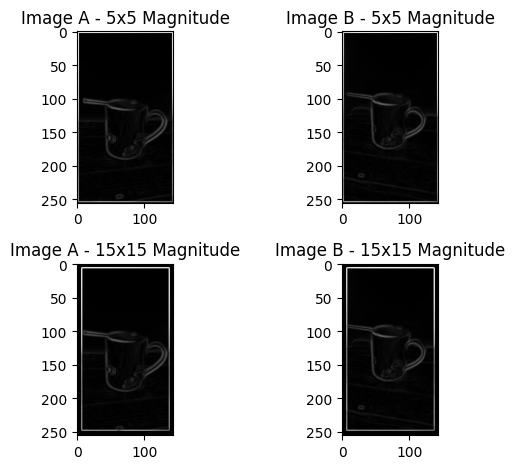

In [57]:
# apply magnitude function on images
magnitude_A_five = gradient_magnitude(sobel_x_A_five, sobel_y_A_five)
magnitude_B_five = gradient_magnitude(sobel_x_B_five, sobel_y_B_five)
magnitude_A_fifteen = gradient_magnitude(sobel_x_A_fifteen, sobel_y_A_fifteen)
magnitude_B_fifteen = gradient_magnitude(sobel_x_B_fifteen, sobel_y_B_fifteen)

plt.subplot(221), plt.imshow(magnitude_A_five, cmap='gray')
plt.title("Image A - 5x5 Magnitude")
plt.subplot(222), plt.imshow(magnitude_B_five, cmap='gray')
plt.title("Image B - 5x5 Magnitude")
plt.subplot(223), plt.imshow(magnitude_A_fifteen, cmap='gray')
plt.title("Image A - 15x15 Magnitude")
plt.subplot(224), plt.imshow(magnitude_B_fifteen, cmap='gray')
plt.title("Image B - 15x15 Magnitude")
plt.tight_layout()
plt.show()

### Gradient Orientation

In [58]:
# function to calculate the orientation of image
def gradient_orientation(sobel_x, sobel_y):
    result = np.zeros(sobel_x.shape)
    (shape_y, shape_x) = sobel_x.shape

    for x in range(0, shape_x):
      for y in range(0, shape_y):
        result[y,x] = np.arctan2(sobel_y[y, x], sobel_x[y, x])

    return result

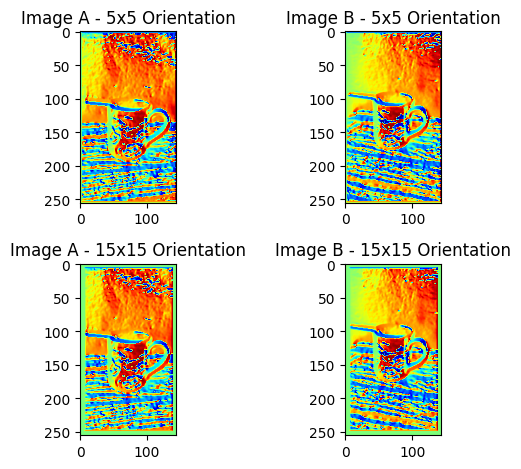

In [59]:
# apply orientation function to images
orientation_A_five = gradient_orientation(sobel_x_A_five, sobel_y_A_five)
orientation_B_five = gradient_orientation(sobel_x_B_five, sobel_y_B_five)
orientation_A_fifteen = gradient_orientation(sobel_x_A_fifteen, sobel_y_A_fifteen)
orientation_B_fifteen = gradient_orientation(sobel_x_B_fifteen, sobel_y_B_fifteen)

plt.subplot(221), plt.imshow(orientation_A_five, cmap='jet')
plt.title("Image A - 5x5 Orientation")
plt.subplot(222), plt.imshow(orientation_B_five, cmap='jet')
plt.title("Image B - 5x5 Orientation")
plt.subplot(223), plt.imshow(orientation_A_fifteen, cmap='jet')
plt.title("Image A - 15x15 Orientation")
plt.subplot(224), plt.imshow(orientation_B_fifteen, cmap='jet')
plt.title("Image B - 15x15 Orientation")
plt.tight_layout()
plt.show()